# Introduction to Probability
---

## Probability

**Random variable** $x$ denotes a quantity that is uncertain and which can be either *discrete* or *continuous*.

---

**Probability distribution** $\Pr(x)$ captures the information of how likely a random variable is. A probability distribution of a discrete variable can be visualized by a histogram while the distribution of a continous variable can be visualized with the *probability densitiy function (pdf)*.

---

**Joint probability:** $\Pr(x,y)$, $\Pr(x,y,z), ...$: If we observe multiple paired instances of $x$ and $y$ some combinations occur more frequently.

---

**Marginalization:**

$\Pr(x) = \int \Pr(x,y)\partial y$ (continuous)

$\Pr(y) = \int \Pr(x,y)\partial x$

$\Pr(x) = \sum_{y} \Pr(x,y)$ (discrete)

$\Pr(y) = \sum_{x} \Pr(x,y)$

---

**Conditional probability:**
$\Pr(x \vert y)= \frac{\Pr(x,y)}{\Pr(y)} \\ 
\Leftrightarrow \Pr(x,y) \\ = \Pr(x \vert y)\Pr(y) \\
= \Pr(y \vert x)\Pr(x)$

---

**Bayes' Rule:**
$\Pr(y \vert x) = \frac{Pr(x \vert y)\Pr(y)}{\Pr(x)} \\
= \frac{Pr(x \vert y)\Pr(y)}{\int \Pr(x, y) dy} \\
= \frac{\Pr(x \vert y)\Pr(y)}{\int \Pr(x \vert y)\Pr(y) dy}$

---

**Independence:**
if $x$ tells us nothing about $y$, we can write:

$\Pr(x \vert y)=\Pr(x)$

$\Pr(y \vert x)=\Pr(y)$

$\Rightarrow \Pr(x,y)=\Pr(x \vert y)\Pr(y)=\Pr(x)\Pr(y)$

---

**Expectation:**
Given $f[\circ]$ that returns value $\forall$ possible values $x^*$

$\mathrm{E}[f[x]] = \sum_{x}f[x]\Pr(x)$ (discrete)

$\mathrm{E}[f[x]] = \int f[x]\Pr(x) \partial x$

(e.g.): $\mathrm{E}[f[x,y]] = \int \int f[x,y]\Pr(x,y) \partial x \partial y$

---

## Common probability distributions

**Bernoulli distribution:**

binary trial, $x\in \{0,1\}$

takes single parameter $\lambda \in [0, 1]$ which defines probability of observing a success $x=1$

$\Pr(x=0)=1-\lambda \\
\Pr(x=1)=\lambda \\
\Leftrightarrow \Pr(x)=\lambda^{x}(1-\lambda)^{1-x} \\
= \Pr(x) = \mathrm{Bern}_x[\lambda]$

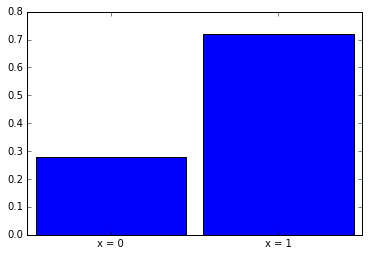

In [47]:
def bernoulli(lmbda):
    return 1 if random.random() < lmbda else 0

x = []
for i in range(100):
    x.append(bernoulli(0.7))
    
hist, bins = np.histogram(x, bins=2)
hist = hist / sum(hist)

plt.bar(
    left=[0, 1],
    height=hist,
    width=0.9,
    align='center',
    tick_label=["x = 0", 'x = 1'])
plt.show()

**Beta distribution**

Continuous distribution defined on a single variable $\lambda \in [0,1]$. (Can be used to represent uncertainty in the $\lambda$ parameter in a Bernoulli distribution)

$\Gamma[z]=\int_{0}^{\infty} t^{z-1}e^{-t} \partial t$, for positive integers: $\Gamma[z]=(z-1)!$ and $\Gamma[z+1]=z\Gamma[z]$

$\mathrm{Beta}_{\lambda}[\alpha,\beta]=\Pr(\lambda)
=\frac{\Gamma[\alpha+\beta]}{\Gamma[\alpha]\Gamma[\beta]} \lambda^{\alpha-1}(1-\lambda)^{\beta-1}$

$\mathrm{E}[\lambda] = \frac{\alpha}{\alpha+\beta}$

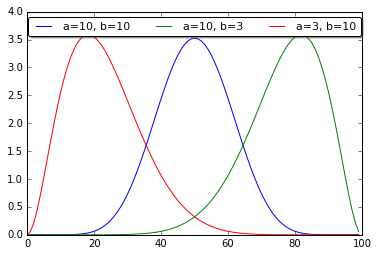

In [83]:
def Gamma(z):
    return math.factorial(z-1)

def gen_beta(alpha, beta):
    assert(alpha >= 0)
    assert(beta >= 0)
    p = Gamma(alpha + beta) / (Gamma(alpha) * Gamma(beta))
    a = alpha - 1
    b = beta - 1
    return lambda lmbda: p * math.pow(lmbda,a) * math.pow((1-lmbda),b)

beta1 = gen_beta(10, 10)
beta2 = gen_beta(10, 3)
beta3 = gen_beta(3, 10)
a = []
b = []
c = []
for i in np.arange(0, 1, 0.01):
    a.append(beta1(i))
    b.append(beta2(i))
    c.append(beta3(i))

a = plt.plot(a, label="a=10, b=10")
b = plt.plot(b, label="a=10, b=3")
c = plt.plot(c, label="a=3, b=10")
plt.legend(loc='upper center', ncol=3, fancybox=True, shadow=True, fontsize=11)
plt.show()

---
# Helpers and libraries

In [48]:
%matplotlib inline
import random
import math
import scipy.integrate as integrate
import numpy as np
import scipy.special as special
from numpy.random import normal
import matplotlib.pyplot as plt